<a href="https://colab.research.google.com/github/SidSolanki28/Credit-Card-Customer-Segmentation/blob/master/credit_card_model_builiding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Features ###

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

# Importing Libraries

In [2]:
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

In [3]:
# To display all rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
### Importing content from drive ###

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset

In [5]:
df = pd.read_csv("/content/drive/My Drive/Project/Credit Card || Clustering || Kmeans/credit_card_pre_processed.csv")

# Data Inspection

## Shape

In [6]:
df.shape

(8950, 17)

## Dataset

In [7]:
df.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
6   627.260806           1.000000    7091.01           6402.63   
7  1823.652743           1.000000     436.20              0.00   
8  1014.926473           1.000000     861.49            661.49   
9   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

# Feature Engineering

## Define X&Y

In [8]:
X = df.iloc[:, :].values

In [9]:
X

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

# Feature Scaling

## Standarsization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

In [11]:
X.shape

(8950, 17)

In [12]:
X

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# No. of Clusters

## Elbow Method

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.

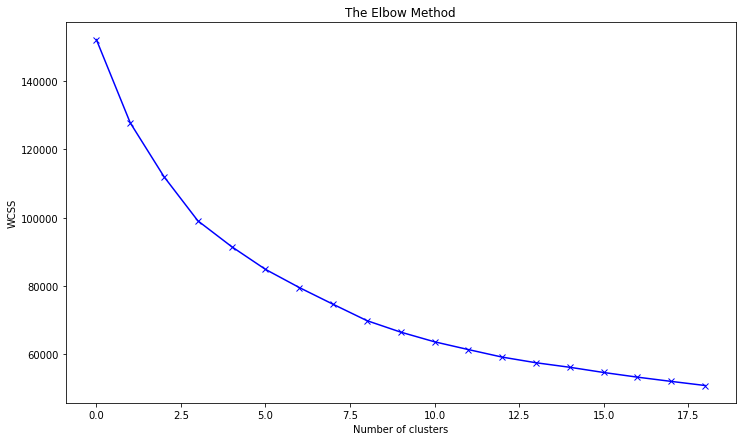

In [13]:
plt.figure(figsize=(12,7))

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 20), wcss)
plt.plot(wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Model Training

## K means

In [14]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [15]:
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [16]:
labels

array([6, 3, 4, ..., 2, 2, 2], dtype=int32)

In [17]:
cluster_centers

array([[ 1.92305052e+00,  3.37716867e-01,  1.12120418e+01,
         1.06003671e+01,  7.03311838e+00,  4.19625127e-01,
         1.04698328e+00,  1.91550149e+00,  9.81333653e-01,
        -2.58911831e-01,  6.12285458e-02,  5.36243850e+00,
         3.04406408e+00,  8.09897492e+00,  1.12031761e+00,
         1.11013157e+00,  3.10863465e-01],
       [-7.01229283e-01, -2.14411628e+00, -3.11098786e-01,
        -2.35720118e-01, -3.02413627e-01, -3.21904751e-01,
        -5.56586290e-01, -4.44988775e-01, -4.39729749e-01,
        -5.20843751e-01, -3.76102518e-01, -4.19789965e-01,
        -1.77161361e-01, -2.02048177e-01, -2.56658204e-01,
         2.81550499e-01,  1.99199458e-01],
       [-3.36049587e-01, -3.47077860e-01, -2.89266864e-01,
        -2.15966042e-01, -2.86835279e-01,  6.82835664e-02,
        -2.03077759e-01, -2.88661118e-01, -2.24548914e-01,
         3.08663197e-01,  9.96472666e-04, -3.88116768e-01,
        -5.67159431e-01, -3.92679966e-01, -2.09145007e-01,
         1.40113780e-02, -3.2

In [18]:
labels.shape, cluster_centers.shape

((8950,), (8, 17))

In [19]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([6, 3, 4, ..., 2, 2, 2], dtype=int32)

In [20]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [21]:
cluster_name = pd.DataFrame({'CLUSTER': labels})

In [22]:
df1 = pd.concat( [df, cluster_name], axis =1 )

In [23]:
df1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0   201.802084        139.509787          0.000000      12        6  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        4  
3     0.000000        864.206542          0.000000      12        6  
4   678.334763        244.791237          0.000000      12        6

# Model Visualization

In [24]:
total_clusters = len(df1['CLUSTER'].unique())
total_clusters

8

## Cluster Analysis

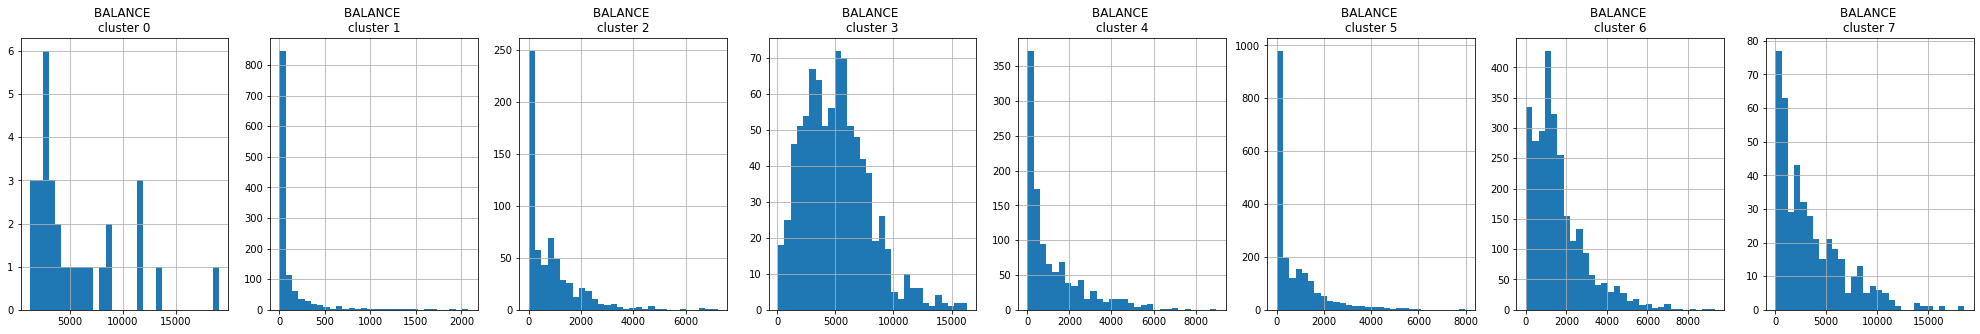

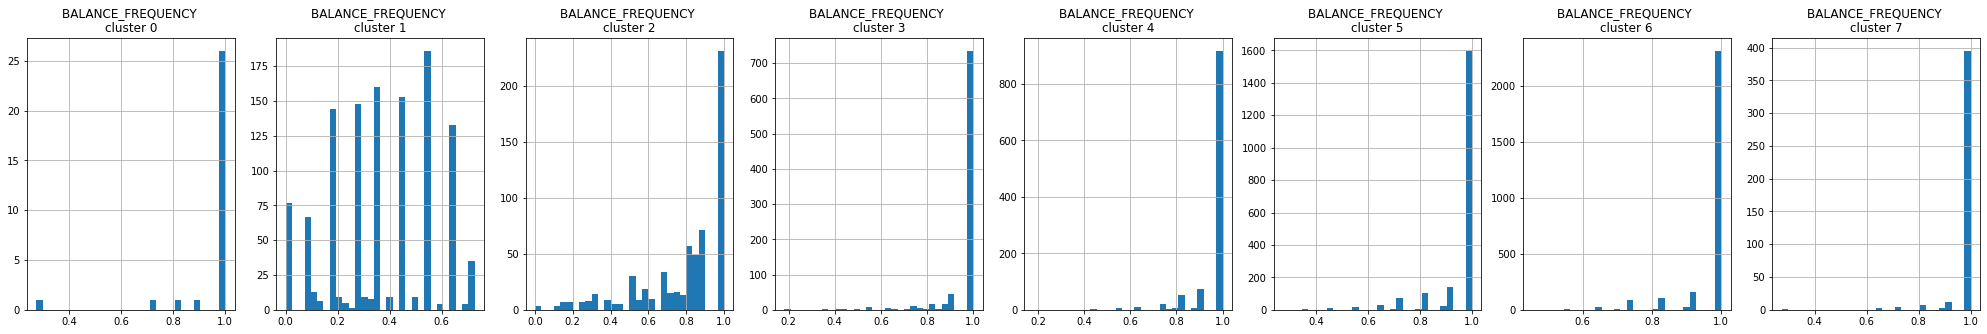

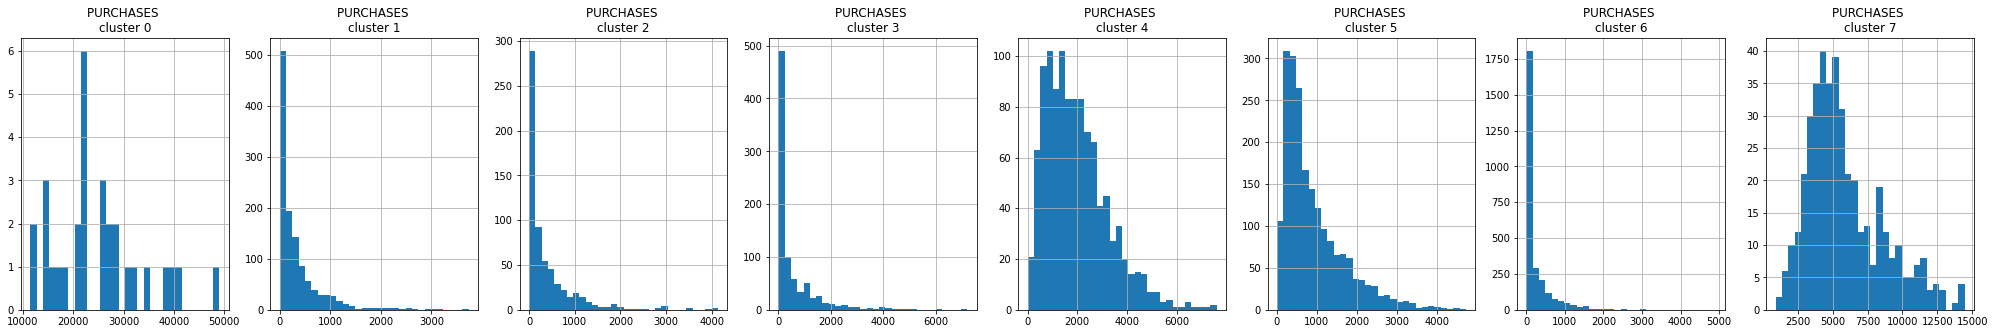

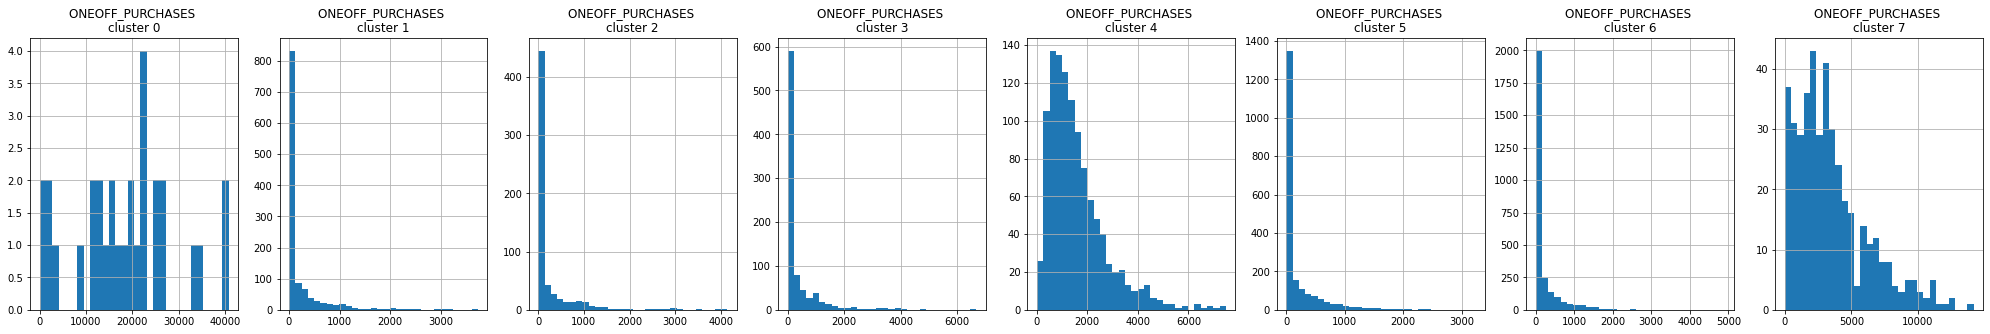

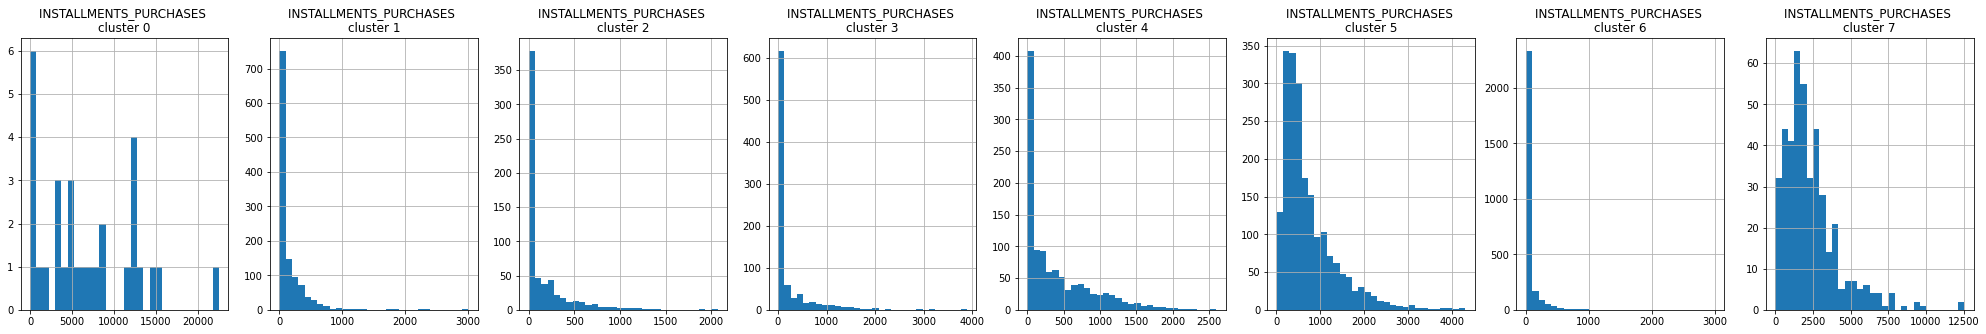

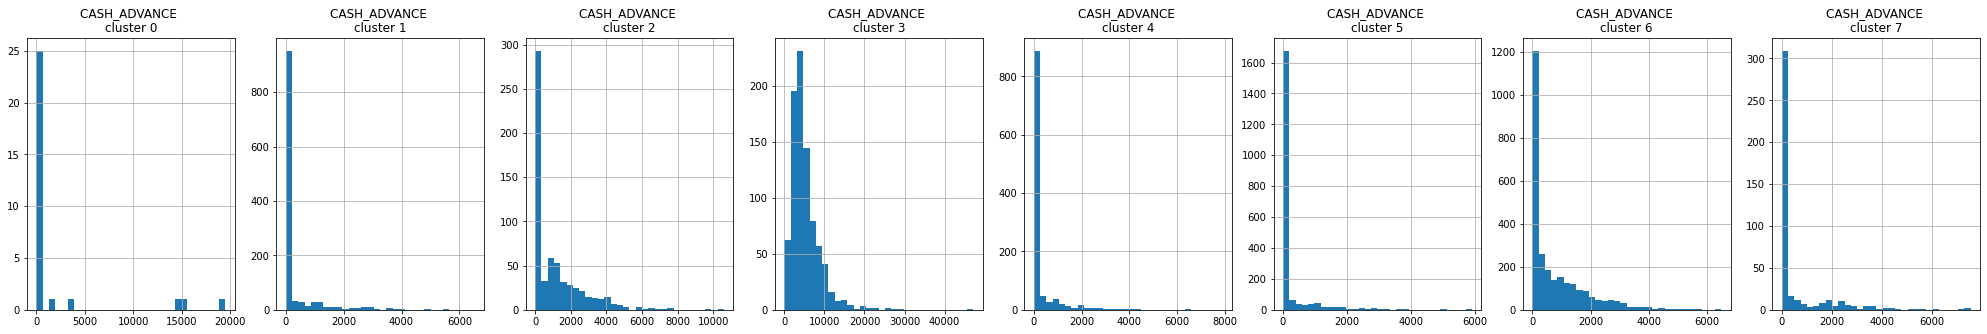

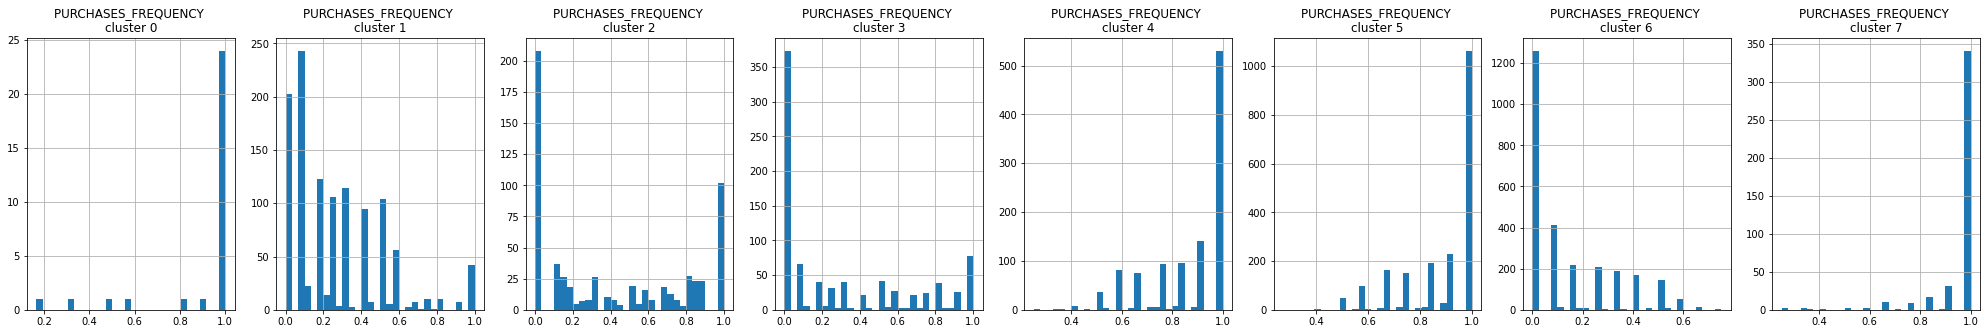

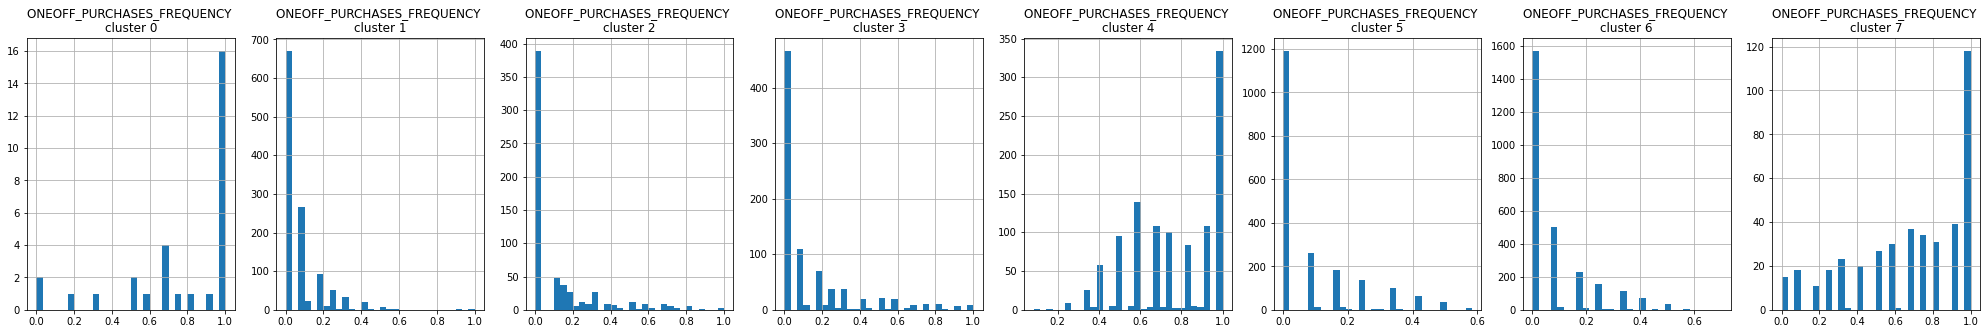

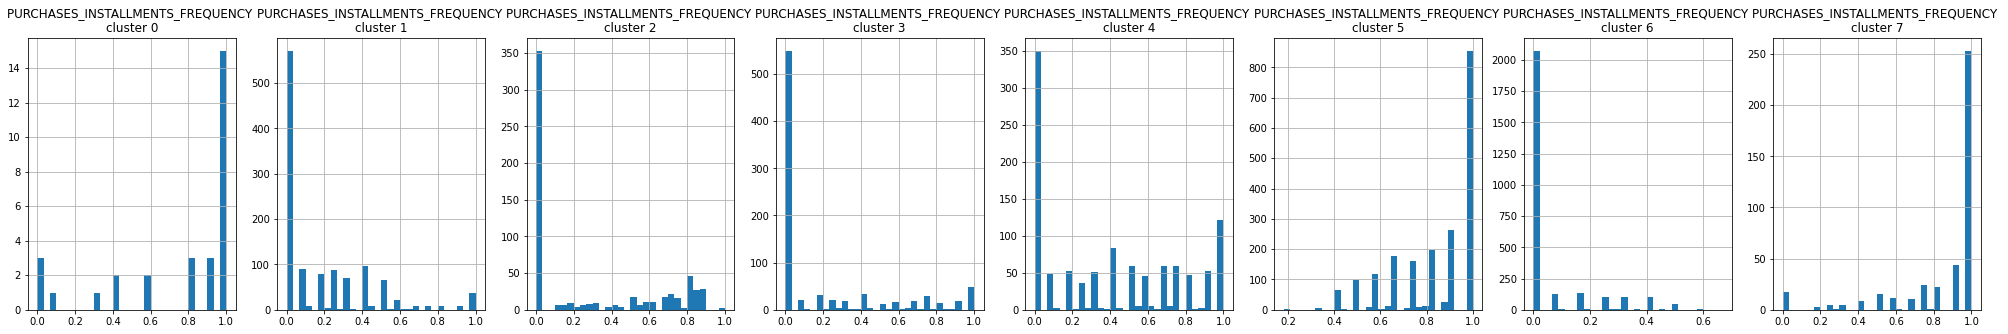

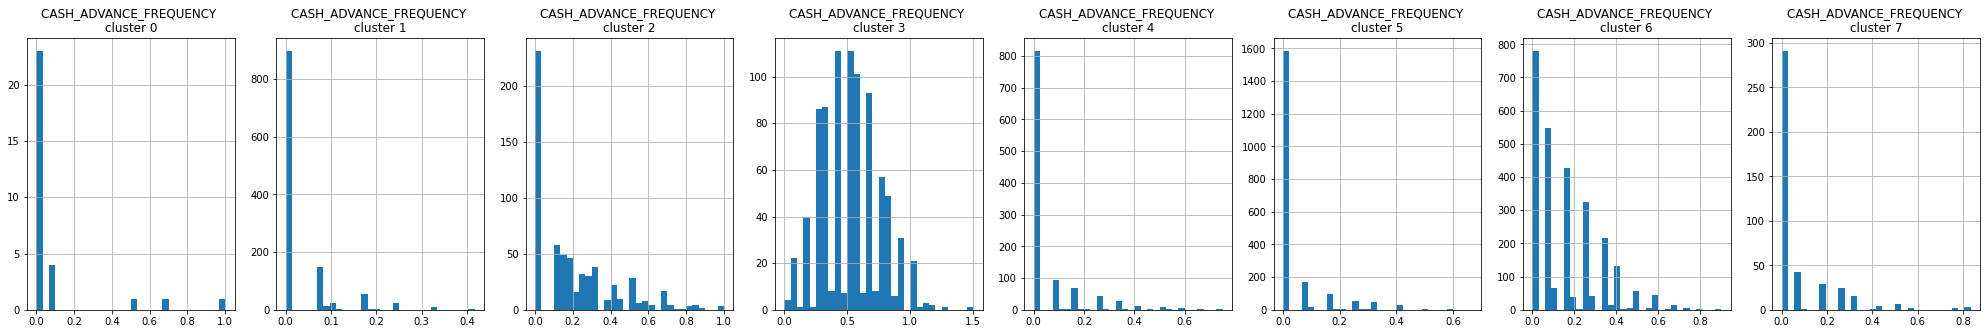

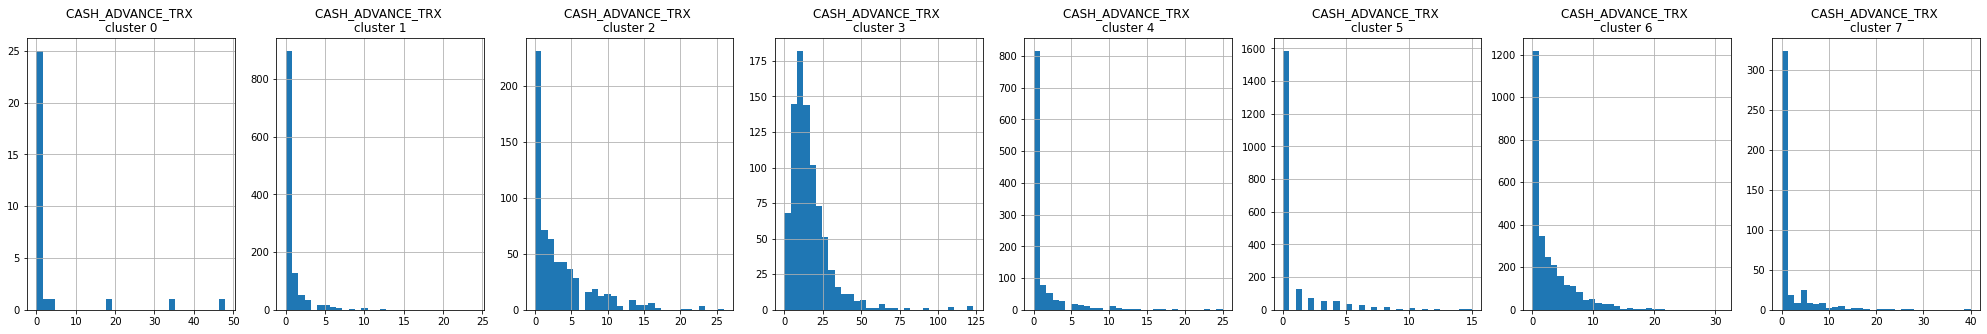

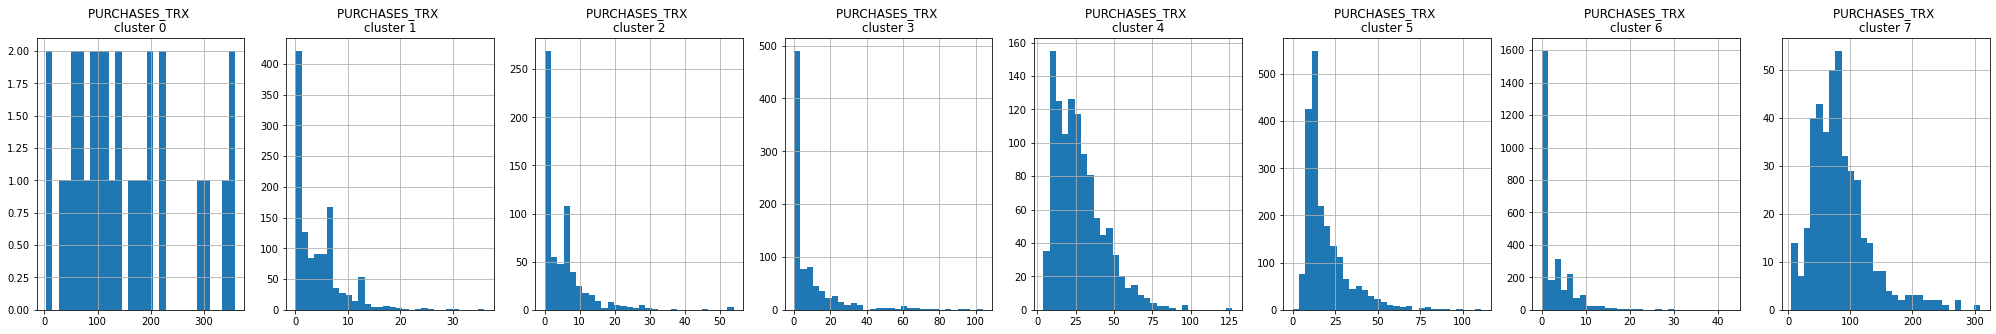

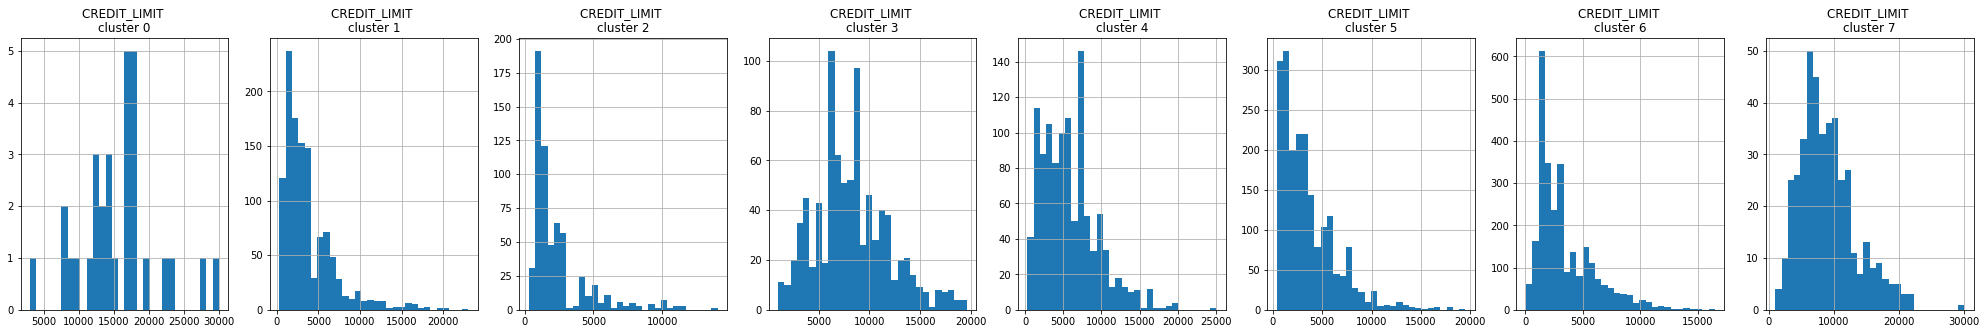

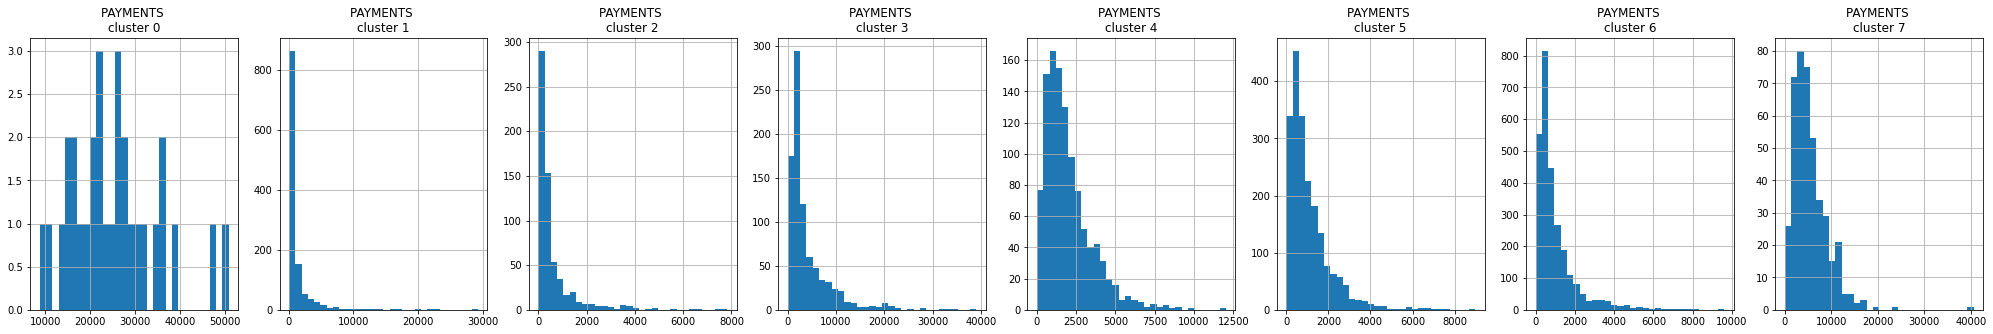

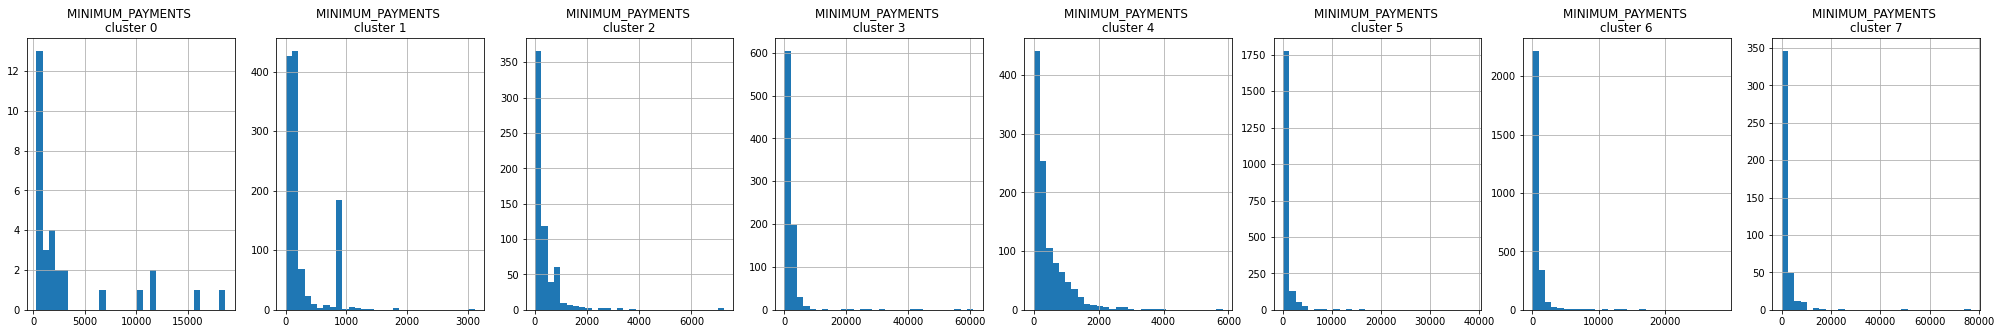

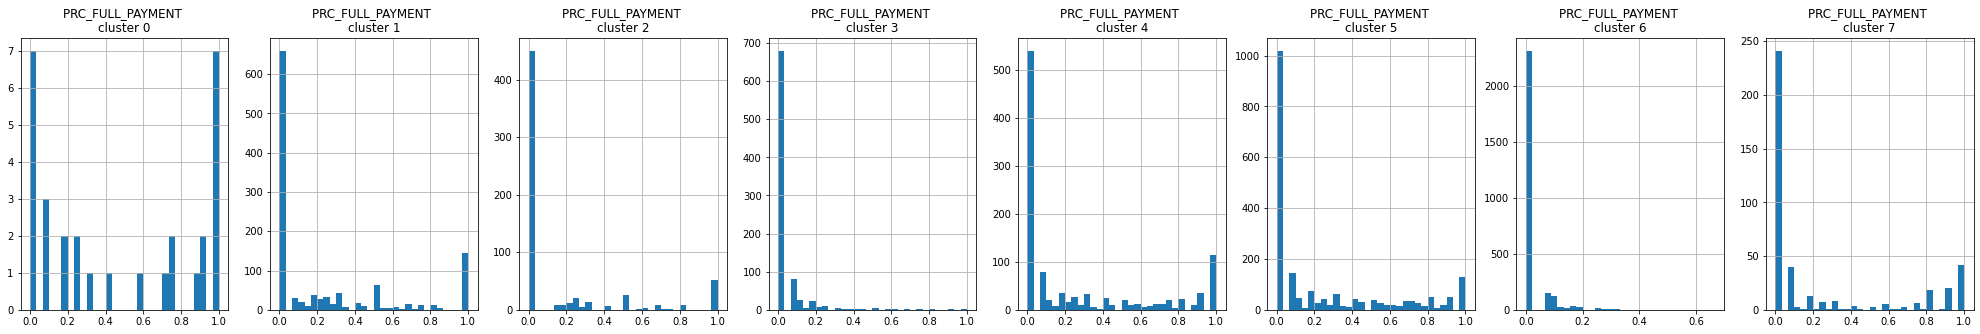

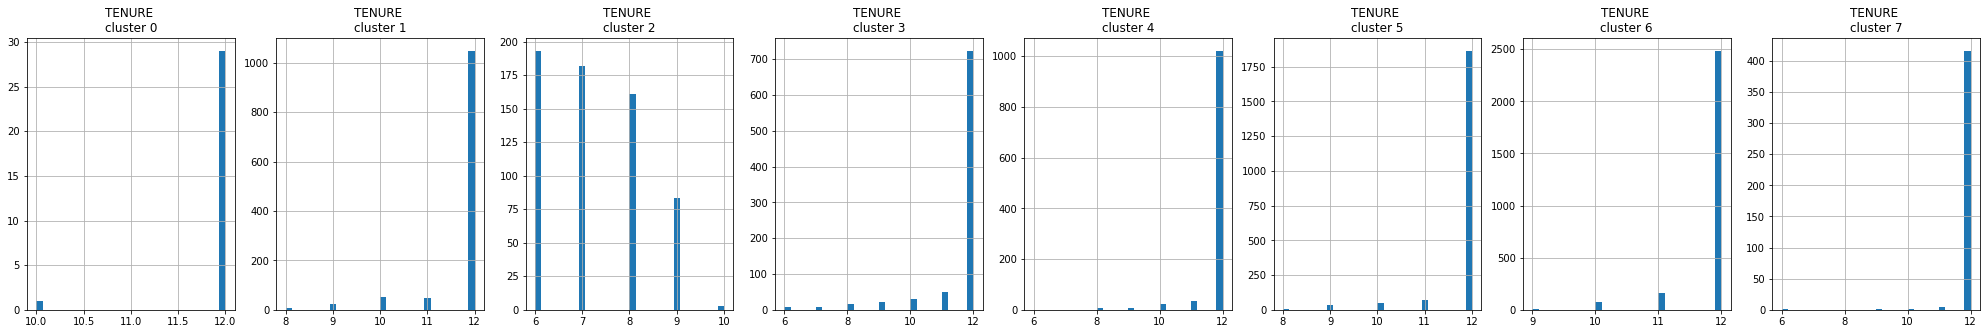

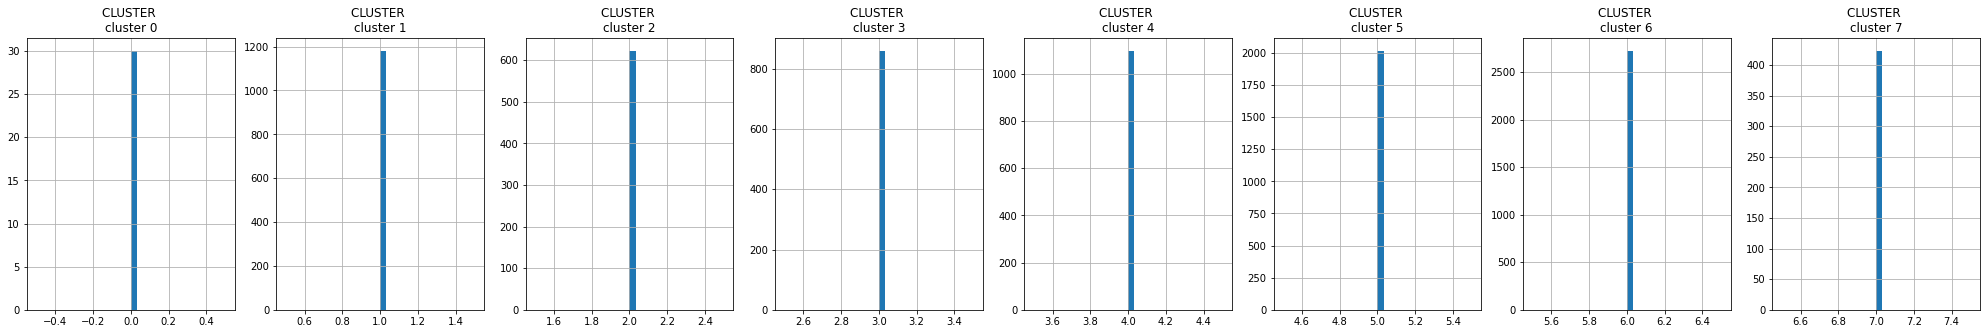

In [25]:
for i in df1.columns:
    plt.figure(figsize=(35,5))
    for j in range(total_clusters):
        plt.subplot(1,8,j+1)
        cluster_df = df1[df1['CLUSTER'] == j]
        cluster_df[i].hist( bins = 30)
        plt.title(f'{i} \ncluster {j}')
    plt.show()

## PCA

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state=42)
pca_X = pca.fit_transform(X)

In [27]:
pca_X.shape

(8950, 2)

In [28]:
pca_X = pd.DataFrame(pca_X, columns = ['PC1', 'PC2'])

In [29]:
pca_X

PC1        PC2
0     -1.682221  -1.076453
1     -1.138292   2.506465
2      0.969685  -0.383512
3     -0.873628   0.043159
4     -1.599435  -0.688581
5      0.251295  -0.780063
6      6.352917  -0.692547
7      0.277104  -1.290725
8     -0.441748  -0.461850
9     -0.562515  -0.366359
10     0.540494  -1.312969
11    -0.684703  -0.785407
12     1.980273  -1.322187
13     1.560544  -0.879473
14    -1.588077   0.233047
15     0.790389   1.846940
16    -2.097179   0.955456
17    -0.956394  -1.577289
18     0.500373  -0.096186
19     0.783485   0.049660
20    -0.142561  -0.068583
21     5.525260   1.743806
22     0.417806  -1.738999
23     2.802350   3.700239
24    -1.425290   1.926808
25     0.164615  -1.633429
26    -1.443728   0.430660
27    -0.048514  -1.773515
28    -0.013242   4.129399
29    -0.770607  -0.866070
30     3.755413   4.297939
31     1.410227  -0.686232
32    -0.570198   2.135499
33     0.374687  -1.462497
34     2.011231   1.414917
35    -1.760320  -0.180052
36    -1.424372   5.476322
37     1.843845   1.254863
38    -0.958228   3.144049
39     0.664751   3.517115
40    -1.753069   0.705037
41     0.446785   0.653746
42    -1.114671   0.304966
43    -1.813161   0.012371
44     1.890441  -0.083290
45    -0.879149  -0.093675
46    -1.794208  -0.740285
47    -1.786956   2.066975
48     3.546266  -2.008870
49    -1.085257  -0.123911
50     0.359313   7.150109
51     1.543153  -0.831743
52    -1.726874   0.471405
53     0.471170  -0.102797
54    -0.718140  -1.617001
55    -0.456935  -0.314491
56    -1.110657   1.300802
57     4.006994   0.065211
58    -1.576958   0.885606
59    -0.489753   1.643512
60    -0.905804  -0.051491
61    -1.536124  -0.504047
62    -1.660710   2.184039
63    -1.791815  -1.289518
64     2.147931  -0.168293
65    -0.399677  -0.728965
66    -2.182641  -0.210982
67    -1.900729   0.936937
68     0.552994   0.258453
69    -0.387741  -0.411199
70     0.392253   1.067225
71     4.754040  10.967396
72    -1.645142   0.333194
73    -0.530749  -0.731782
74    -0.649107  -0.573810
75     0.771051   0.163194
76     1.362478  -0.108633
77    -0.328065  -1.269806
78    -1.649043   0.196801
79     0.015270   3.110253
80    -0.147083  -1.352883
81    -1.888935   0.595400
82    -0.391884  -0.957630
83    -0.484326  -2.132768
84     3.932692   0.323754
85     2.226276  -0.856172
86     2.290919   4.986493
87     3.259339   5.007294
88    -1.229748   0.505577
89    -1.377339   3.325788
90     4.924730   2.168031
91     0.420915   2.544364
92    -1.598020  -0.219935
93    -1.231025  -0.553876
94    -1.093798  -0.411945
95    -1.780088  -0.170207
96     0.189424  -0.509731
97    -1.808132   1.857955
98    -0.981756  -1.667721
99    -2.620499  -0.833055
100   -1.985419  -1.086432
101    0.308689  -2.092975
102    4.228444   0.176439
103    0.074541  -2.052533
104   -1.479877   0.065564
105   -0.889610   1.100131
106    0.572611  -1.595240
107   -1.695456   5.611650
108   -0.350200  -0.658642
109    4.996763   5.198630
110    1.212044  -1.408647
111   -1.579977   0.551608
112    3.218206   1.681314
113   -1.266206   2.987368
114    0.930552  -1.601361
115    1.257705  -1.508210
116    0.826817  -1.306369
117   -1.820109   1.019222
118   -0.710969  -1.510568
119   -1.723593   0.963633
120    6.232478   3.367176
121   -0.287534  -0.095941
122    4.817509  -0.619707
123   -1.588080   0.698516
124   -0.046562   5.807546
125    9.504108   0.917634
126   -2.198015  -0.672460
127    1.132406  -0.262932
128   -0.293351   6.422655
129   -1.717212   0.419540
130   -1.108834  -0.736342
131    1.504974  -0.098313
132   -0.859009  -1.425141
133    0.267816   8.099566
134    0.313158  -1.455004
135   -0.220266  -0.682998
136    4.949883  -0.146821
137    0.480602  -0.635494
138   19.141614   6.683647
139    0.634784  -0.327708
140   -0.991510  -0.873541
141   -1.529203   0.552286
142   -1.591010   3.076100
143    2.710262   2.473134
144    5.662574  -0.548458
145   -0.686692   0.259203
146    0.469289  -1.000710
147   -1.128391 

In [30]:
cluster_name

CLUSTER
0           6
1           3
2           4
3           6
4           6
5           5
6           7
7           5
8           6
9           1
10          5
11          6
12          5
13          5
14          6
15          3
16          2
17          1
18          5
19          5
20          5
21          7
22          5
23          3
24          6
25          5
26          6
27          5
28          3
29          6
30          3
31          5
32          6
33          4
34          5
35          6
36          3
37          4
38          3
39          3
40          6
41          4
42          6
43          6
44          5
45          6
46          2
47          6
48          4
49          6
50          3
51          4
52          6
53          4
54          5
55          6
56          6
57          4
58          6
59          6
60          6
61          6
62          6
63          1
64          5
65          6
66          2
67          6
68          5
69          6
70          5
71          3
72          2
73          6
74          6
75          5
76          4
77          5
78          6
79          3
80          5
81          1
82          1
83          1
84          4
85          4
86          3
87          3
88          6
89          3
90          7
91          3
92          6
93          6
94          6
95          6
96          4
97          6
98          1
99          2
100         2
101         5
102         7
103         1
104         6
105         6
106         5
107         3
108         5
109         7
110         5
111         6
112         7
113         3
114         4
115         5
116         5
117         6
118         1
119         6
120         7
121         6
122         7
123         6
124         3
125         7
126         2
127         5
128         3
129         1
130         1
131         5
132         1
133         3
134         5
135         6
136         7
137         5
138         0
139         4
140         6
141         6
142         3
143         7
144         7
145         6
146         5
147         6
148         5
149         5
150         7
151         4
152         5
153         7
154         5
155         1
156         3
157         6
158         7
159         6
160         6
161         6
162         5
163         6
164         2
165         6
166         5
167         7
168         5
169         4
170         2
171         7
172         1
173         2
174         7
175         6
176         4
177         3
178         7
179         1
180         5
181         1
182         3
183         1
184         4
185         5
186         6
187         5
188         6
189         6
190         1
191         6
192         1
193         5
194         6
195         7
196         5
197         4
198         6
199         3
200         1
201         6
202         5
203         3
204         7
205         1
206         6
207         3
208         3
209         1
210         3
211         4
212         6
213         4
214         6
215         1
216         5
217         1
218         3
219         7
220         7
221         4
222         2
223         4
224         7
225         6
226         5
227         4
228         1
229         7
230         5
231         5
232         4
233         6
234         4
235         4
236         3
237         6
238         1
239         6
240         3
241         1
242         7
243         6
244         4
245         1
246         4
247         5
248         3
249         7
250         6
251         5
252         6
253         4
254         6
255         1
256         6
257         4
258         7
259         6
260         6
261         7
262         7
263         7
264         5
265         7
266         5
267         4
268         6
269         7
270         7
271         6
272         4
273         0
274         3
275         1
276         6
277         1
278         5
279         5
280         4
281         5
282         5
283         5
284         6
28

In [32]:
df2 = pd.concat([pca_X, cluster_name], axis = 1)
df2

PC1        PC2  CLUSTER
0     -1.682221  -1.076453        6
1     -1.138292   2.506465        3
2      0.969685  -0.383512        4
3     -0.873628   0.043159        6
4     -1.599435  -0.688581        6
5      0.251295  -0.780063        5
6      6.352917  -0.692547        7
7      0.277104  -1.290725        5
8     -0.441748  -0.461850        6
9     -0.562515  -0.366359        1
10     0.540494  -1.312969        5
11    -0.684703  -0.785407        6
12     1.980273  -1.322187        5
13     1.560544  -0.879473        5
14    -1.588077   0.233047        6
15     0.790389   1.846940        3
16    -2.097179   0.955456        2
17    -0.956394  -1.577289        1
18     0.500373  -0.096186        5
19     0.783485   0.049660        5
20    -0.142561  -0.068583        5
21     5.525260   1.743806        7
22     0.417806  -1.738999        5
23     2.802350   3.700239        3
24    -1.425290   1.926808        6
25     0.164615  -1.633429        5
26    -1.443728   0.430660        6
27    -0.048514  -1.773515        5
28    -0.013242   4.129399        3
29    -0.770607  -0.866070        6
30     3.755413   4.297939        3
31     1.410227  -0.686232        5
32    -0.570198   2.135499        6
33     0.374687  -1.462497        4
34     2.011231   1.414917        5
35    -1.760320  -0.180052        6
36    -1.424372   5.476322        3
37     1.843845   1.254863        4
38    -0.958228   3.144049        3
39     0.664751   3.517115        3
40    -1.753069   0.705037        6
41     0.446785   0.653746        4
42    -1.114671   0.304966        6
43    -1.813161   0.012371        6
44     1.890441  -0.083290        5
45    -0.879149  -0.093675        6
46    -1.794208  -0.740285        2
47    -1.786956   2.066975        6
48     3.546266  -2.008870        4
49    -1.085257  -0.123911        6
50     0.359313   7.150109        3
51     1.543153  -0.831743        4
52    -1.726874   0.471405        6
53     0.471170  -0.102797        4
54    -0.718140  -1.617001        5
55    -0.456935  -0.314491        6
56    -1.110657   1.300802        6
57     4.006994   0.065211        4
58    -1.576958   0.885606        6
59    -0.489753   1.643512        6
60    -0.905804  -0.051491        6
61    -1.536124  -0.504047        6
62    -1.660710   2.184039        6
63    -1.791815  -1.289518        1
64     2.147931  -0.168293        5
65    -0.399677  -0.728965        6
66    -2.182641  -0.210982        2
67    -1.900729   0.936937        6
68     0.552994   0.258453        5
69    -0.387741  -0.411199        6
70     0.392253   1.067225        5
71     4.754040  10.967396        3
72    -1.645142   0.333194        2
73    -0.530749  -0.731782        6
74    -0.649107  -0.573810        6
75     0.771051   0.163194        5
76     1.362478  -0.108633        4
77    -0.328065  -1.269806        5
78    -1.649043   0.196801        6
79     0.015270   3.110253        3
80    -0.147083  -1.352883        5
81    -1.888935   0.595400        1
82    -0.391884  -0.957630        1
83    -0.484326  -2.132768        1
84     3.932692   0.323754        4
85     2.226276  -0.856172        4
86     2.290919   4.986493        3
87     3.259339   5.007294        3
88    -1.229748   0.505577        6
89    -1.377339   3.325788        3
90     4.924730   2.168031        7
91     0.420915   2.544364        3
92    -1.598020  -0.219935        6
93    -1.231025  -0.553876        6
94    -1.093798  -0.411945        6
95    -1.780088  -0.170207        6
96     0.189424  -0.509731        4
97    -1.808132   1.857955        6
98    -0.981756  -1.667721        1
99    -2.620499  -0.833055        2
100   -1.985419  -1.086432        2
101    0.308689  -2.092975        5
102    4.228444   0.176439        7
103    0.074541  -2.052533        1
104   -1.479877   0.065564        6
105   -0.889610   1.100131        6
106    0.572611  -1.595240        5
107   -1.695456   5.611650        3
108   -0.350200  -0.658642        5
109    4.996763   5.198630        7
110    1.212044 

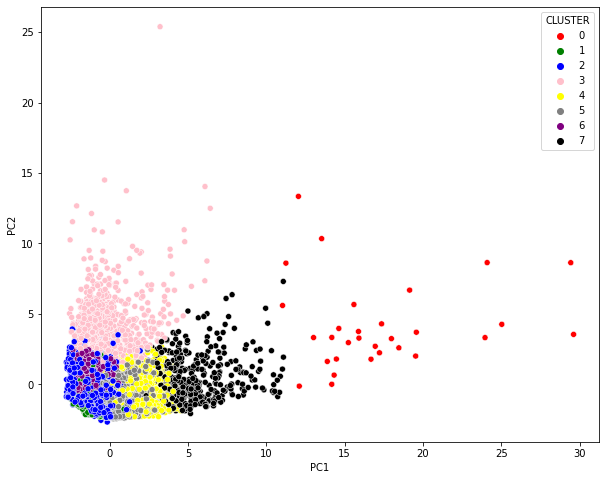

In [33]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df2, x="PC1", y="PC2", hue = 'CLUSTER', palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()